In [13]:
import games
import numpy as np
import matplotlib.pyplot as plt

population = 100

np.random.seed(50)


results = games.group_split_game(population, 30, 50, 1, 0.25, 20, 'equal')

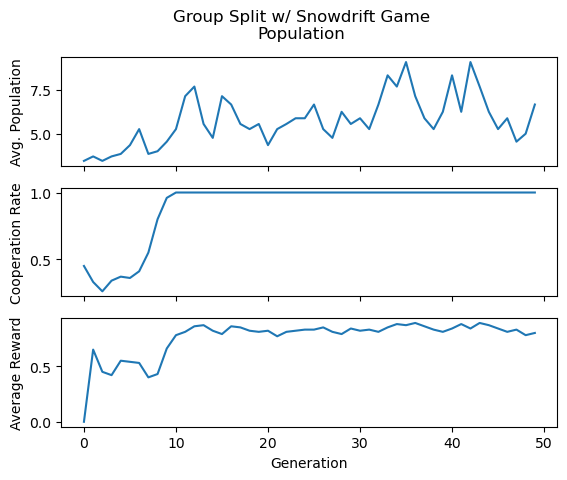

C:\Users\w_pit\AppData\Local\Temp\ipykernel_9632\1538483303.py:20: RuntimeWarning: invalid value encountered in divide
  ax[1].plot(np.divide(results[1][idx], results[0][idx]))
C:\Users\w_pit\AppData\Local\Temp\ipykernel_9632\1538483303.py:21: RuntimeWarning: invalid value encountered in divide
  ax[2].plot(np.divide(results[2][idx], results[0][idx]))


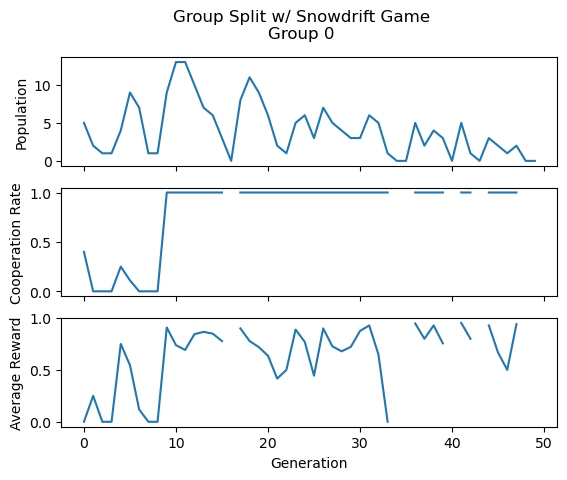

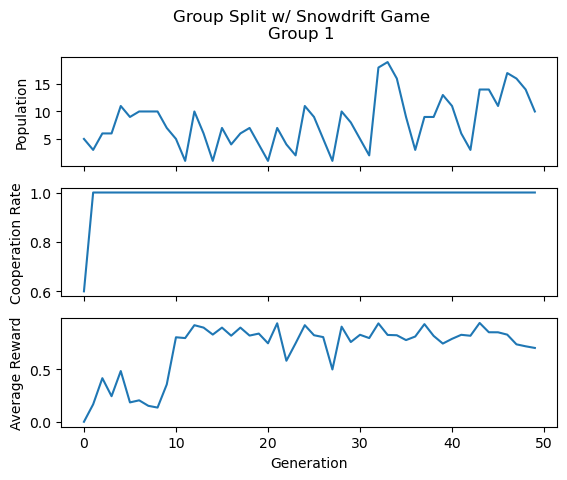

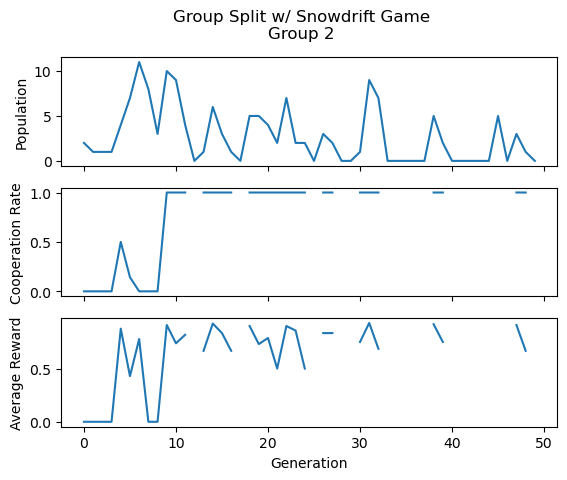

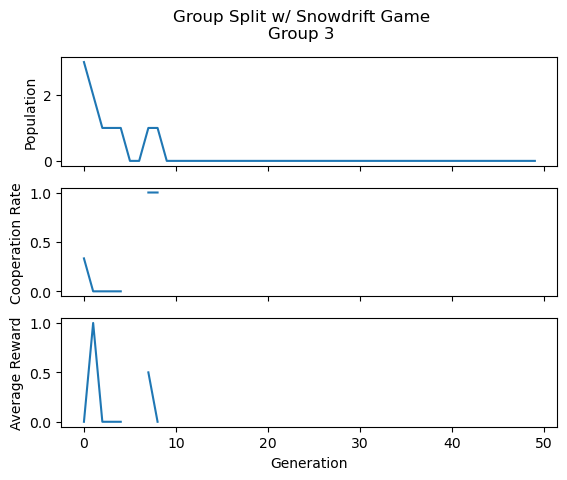

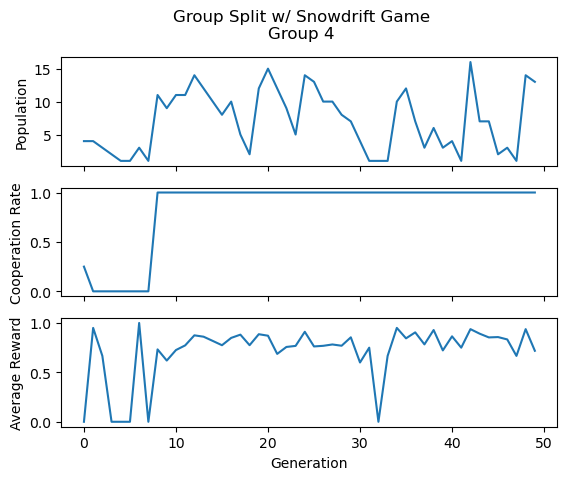

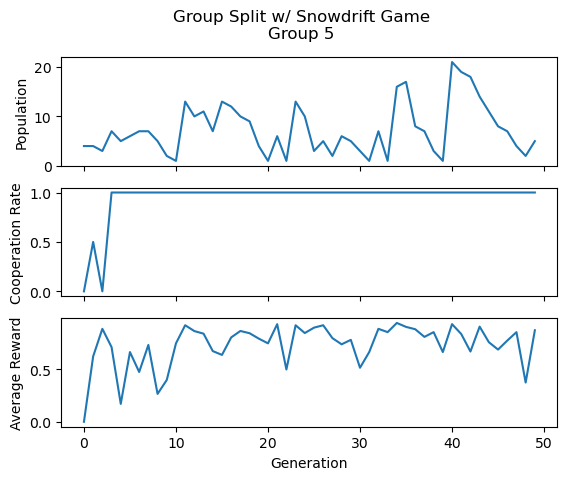

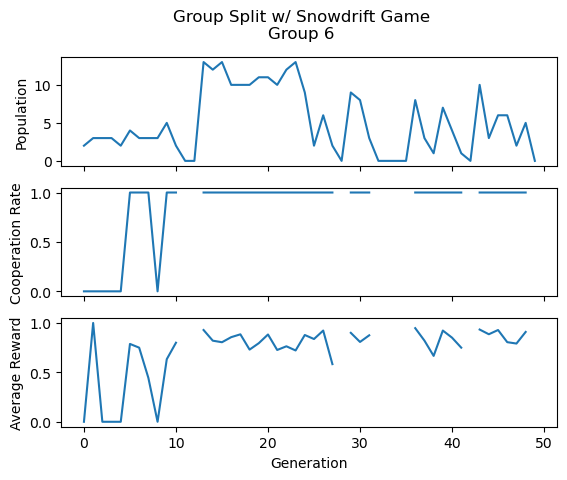

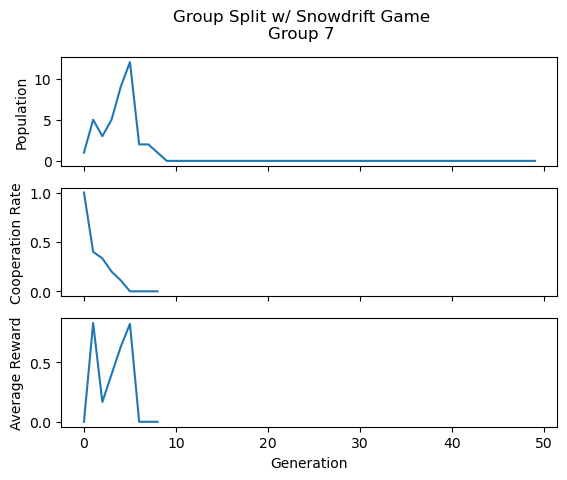

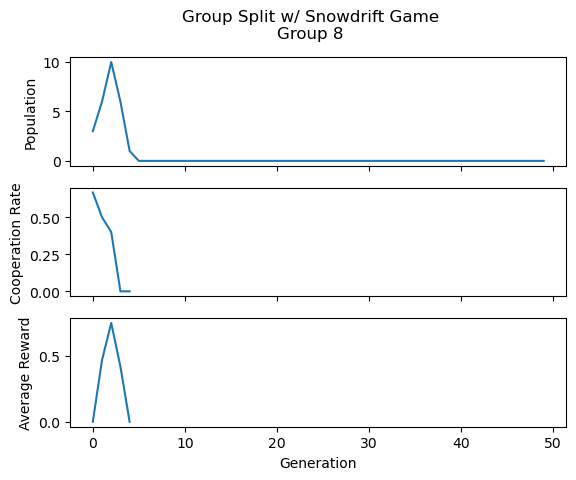

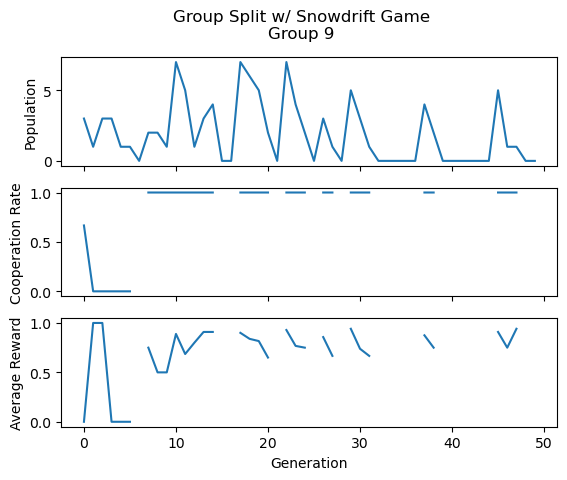

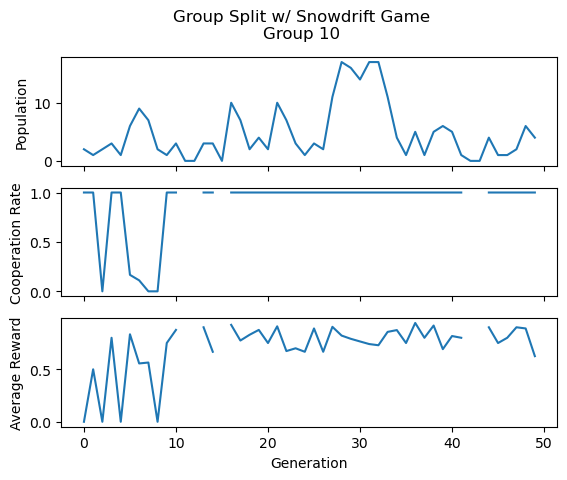

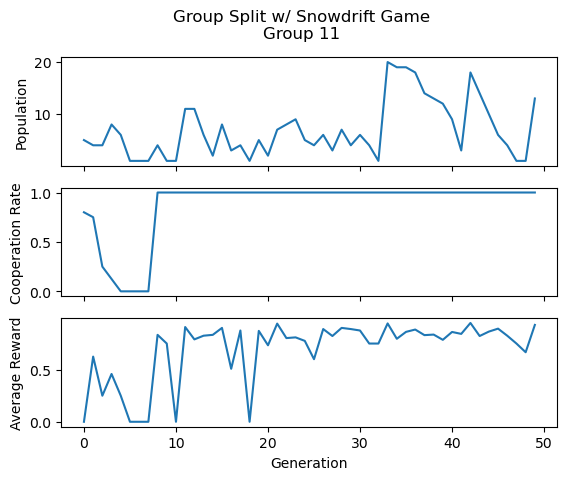

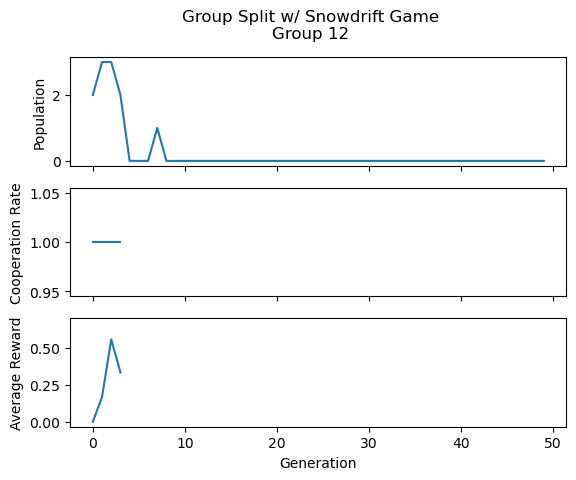

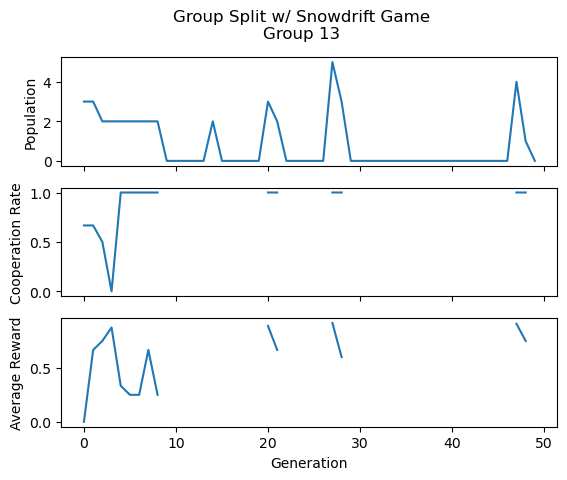

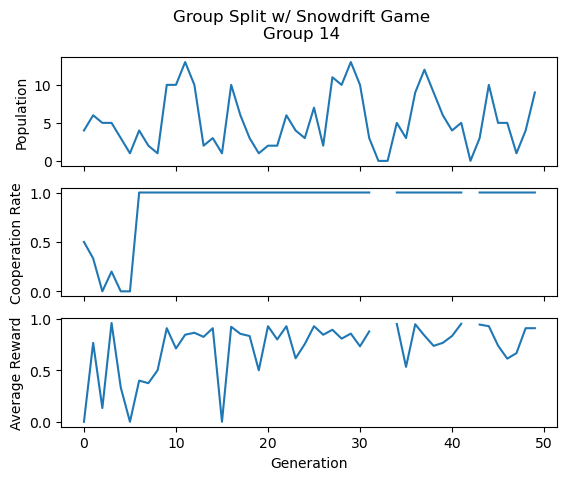

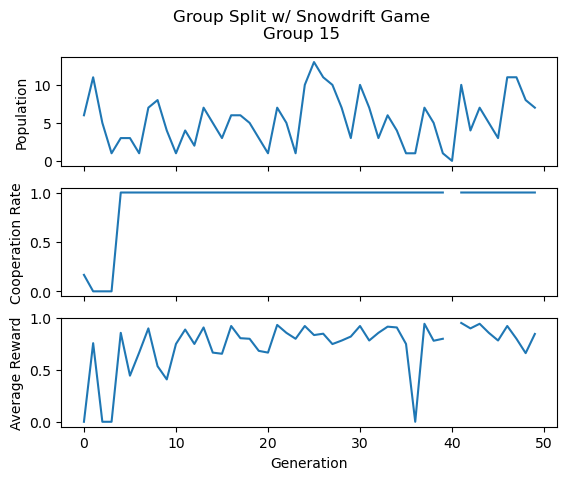

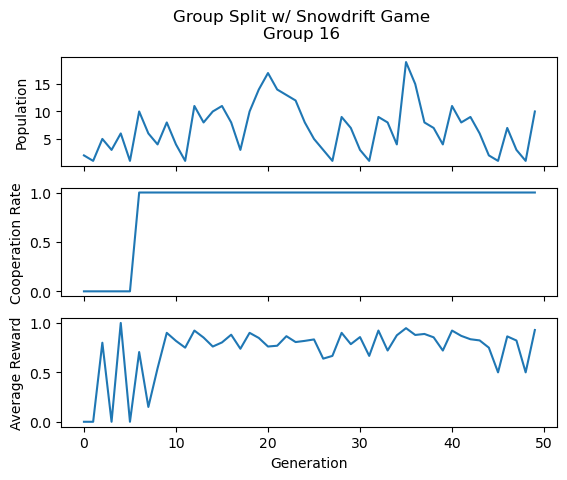

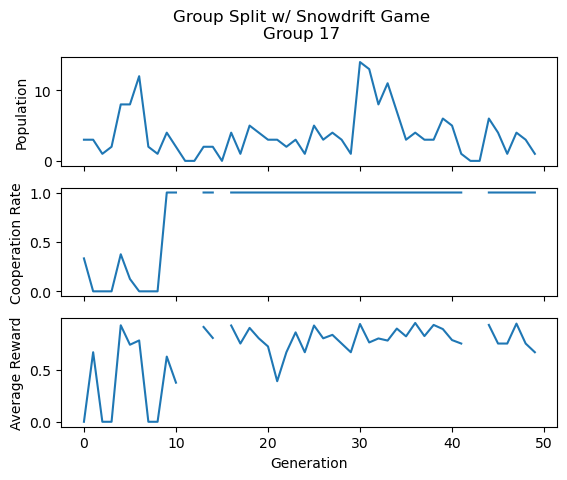

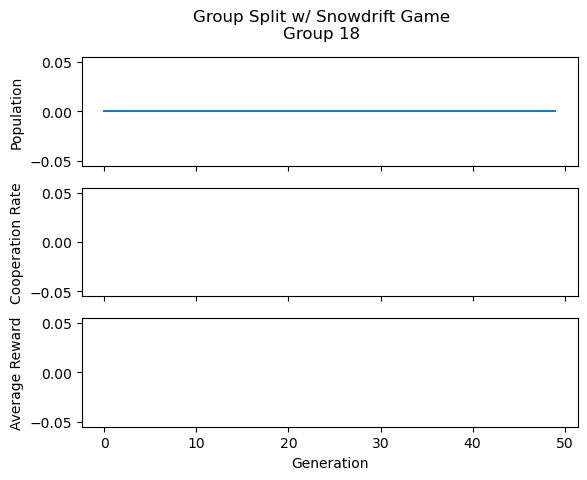

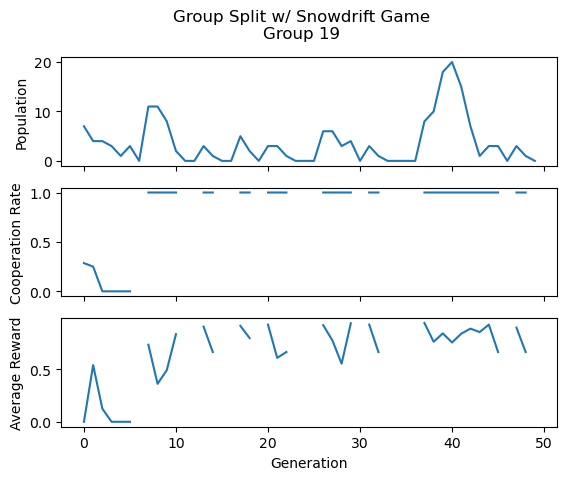

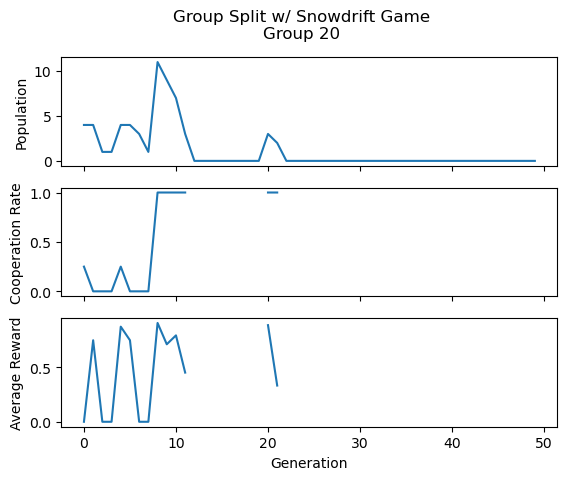

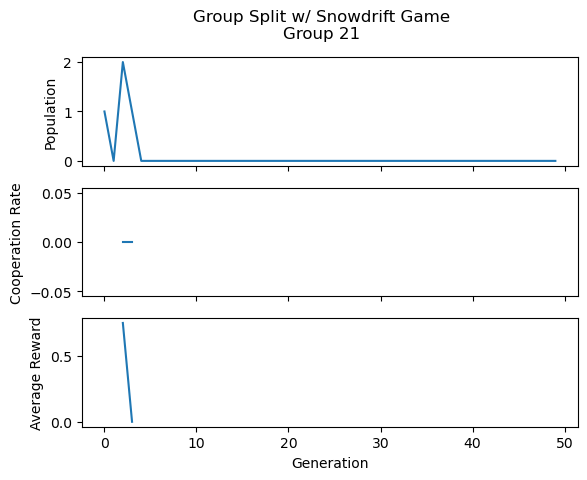

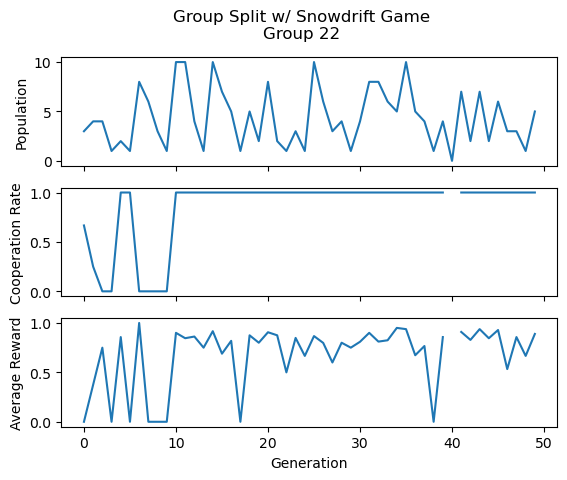

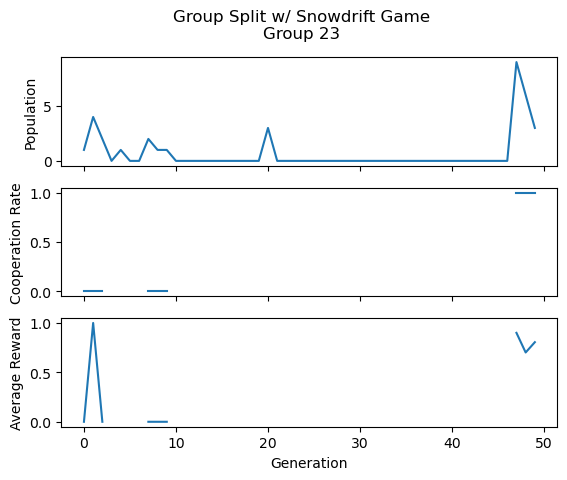

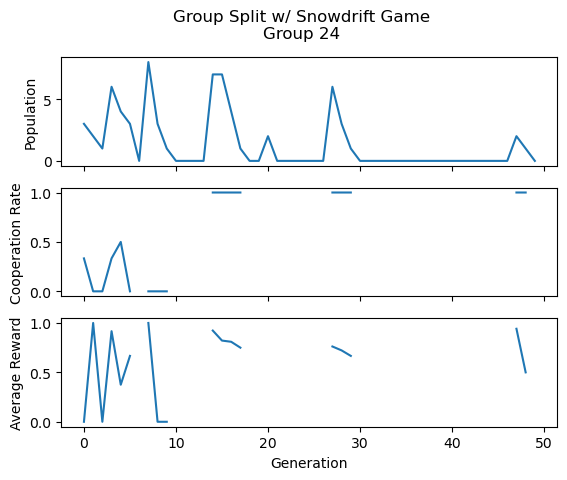

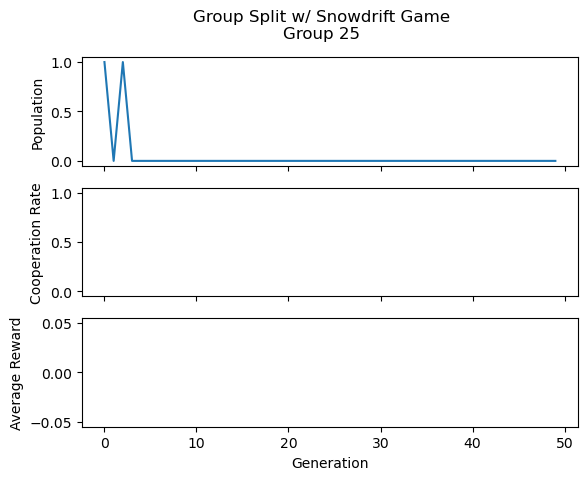

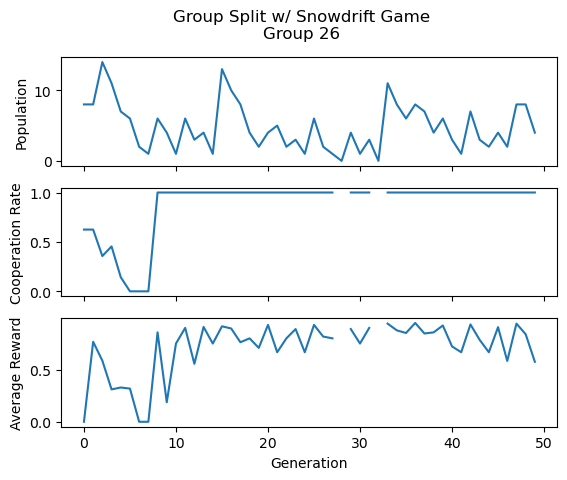

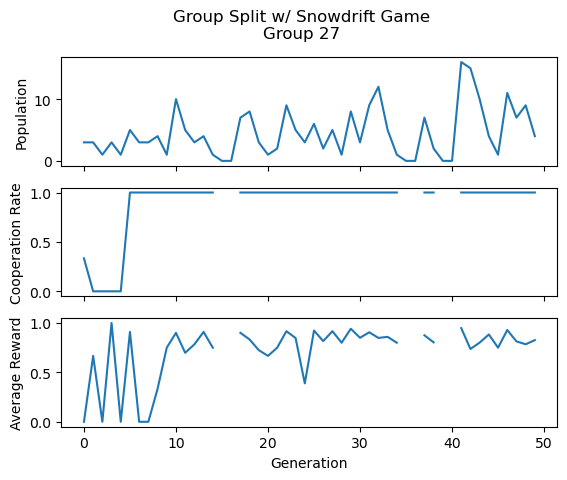

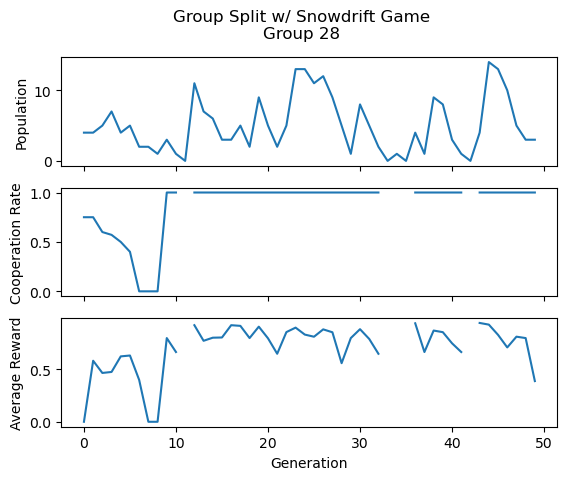

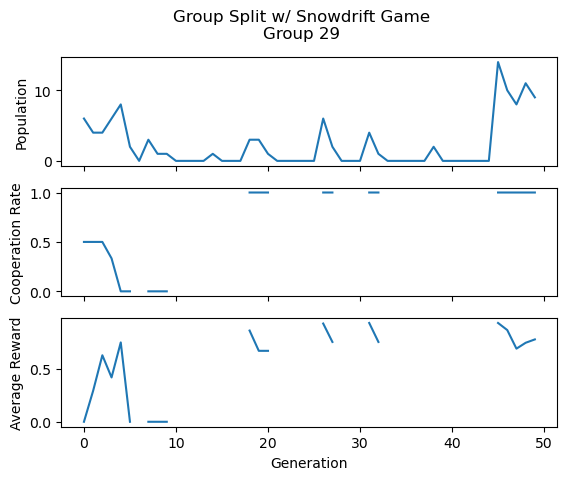

In [14]:
# Plot Population Statistics
fig, ax = plt.subplots(3, sharex=True)

ax[0].plot(results[3])
ax[1].plot(np.divide(results[4], population))
ax[2].plot(np.divide(results[5], population))
ax[0].set_ylabel('Avg. Population')
ax[1].set_ylabel('Cooperation Rate')
ax[2].set_ylabel('Average Reward')

plt.suptitle(f'Group Split w/ Snowdrift Game\nPopulation')
plt.xlabel('Generation')
plt.show()

# Plot Group Statistics
for idx in range(len(results[0])):
    fig, ax = plt.subplots(3, sharex=True)

    ax[0].plot(results[0][idx])
    ax[1].plot(np.divide(results[1][idx], results[0][idx]))
    ax[2].plot(np.divide(results[2][idx], results[0][idx]))
    ax[0].set_ylabel('Population')
    ax[1].set_ylabel('Cooperation Rate')
    ax[2].set_ylabel('Average Reward')
    
    plt.suptitle(f'Group Split w/ Snowdrift Game\nGroup {idx}')
    plt.xlabel('Generation')
    plt.show()

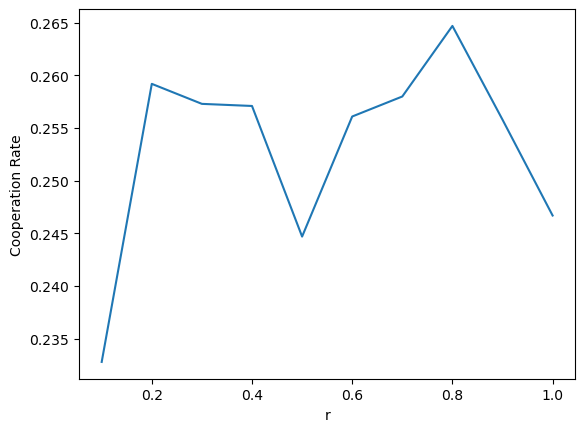

In [1]:
import games
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing

num_runs = 100
population = 100
r_values = np.divide((range(10, 110, 10)), 100)

args = [[num_runs, population, 30, 50, r, 0.25, 20, 'equal'] for r in r_values]
with multiprocessing.Pool() as pool:

    results = pool.starmap(games.group_split_game_averaged, args)
    


    plt.plot(r_values, [game[-1] for game in results])

    plt.ylabel('Cooperation Rate')
    plt.xlabel('r')
    plt.show()